In [1]:
#Importing modules
import numpy as np
import pandas as pd
data = pd.read_csv("merged_data.csv")
data['sales'].head
data.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'dcoilwtico', 'city', 'state', 'type', 'cluster', 'holiday'],
      dtype='object')

In [2]:
#how many sales per day
sum_sales_by_date = data.groupby('date')['sales'].sum().reset_index()

# Display the resulting DataFrame
print(sum_sales_by_date)

oilprice_by_date=data.groupby('date')['dcoilwtico'].sum().reset_index()
print(oilprice_by_date)

            date          sales
0     2013-01-01    2511.618999
1     2013-01-02  496092.417944
2     2013-01-03  361461.231124
3     2013-01-04  354459.677093
4     2013-01-05  477350.121229
...          ...            ...
1679  2017-08-11  826373.722022
1680  2017-08-12  792630.535079
1681  2017-08-13  865639.677471
1682  2017-08-14  760922.406081
1683  2017-08-15  762661.935939

[1684 rows x 2 columns]
            date     dcoilwtico
0     2013-01-01  165975.480000
1     2013-01-02  165975.480000
2     2013-01-03  165672.540000
3     2013-01-04  165939.840000
4     2013-01-05  120627.427833
...          ...            ...
1679  2017-08-11   86979.420000
1680  2017-08-12  120627.427833
1681  2017-08-13  120627.427833
1682  2017-08-14   84805.380000
1683  2017-08-15   84769.740000

[1684 rows x 2 columns]


Index(['date', 'sales'], dtype='object')


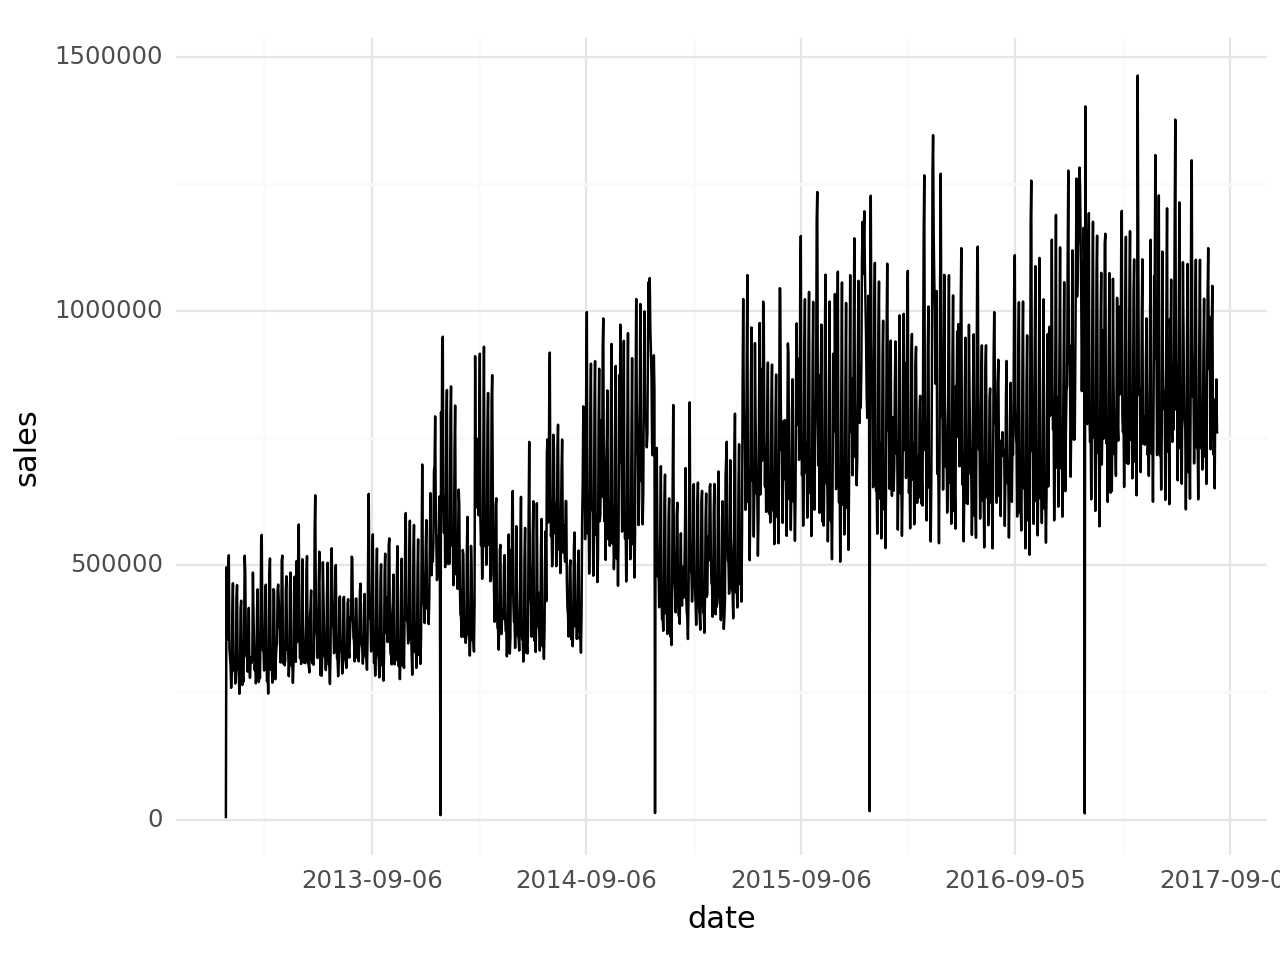

In [3]:
import plotnine as p9
# Convert 'date' to datetime format
df=sum_sales_by_date
print(df.columns)
df['date'] = pd.to_datetime(df['date'])
# Plot using plotnine
plot = (p9.ggplot(df, p9.aes(x='date', y='sales')) +
        p9.geom_line() +
        p9.theme_minimal()
        # You can customize the plot further if needed
        # For example, add labels, titles, or adjust the x-axis date format
        # labs(title="Sales Over Time", x="Date", y="Sales") +
        +p9.scale_x_date(date_breaks="365 day", date_labels="%Y-%m-%d")
        # theme(legend_position='top')
        )

# Display the plot
print(plot)

Index(['date', 'sales'], dtype='object')
<bound method NDFrame.head of           date          sales
0   2013-01-01  363956.181220
1   2013-01-08  332977.628174
2   2013-01-15  340838.619132
3   2013-01-22  320916.224872
4   2013-01-29  362248.459470
..         ...            ...
237 2017-07-18  820367.709874
238 2017-07-25  855872.052943
239 2017-08-01  903114.532729
240 2017-08-08  764122.753677
241 2017-08-15  762661.935939

[242 rows x 2 columns]>


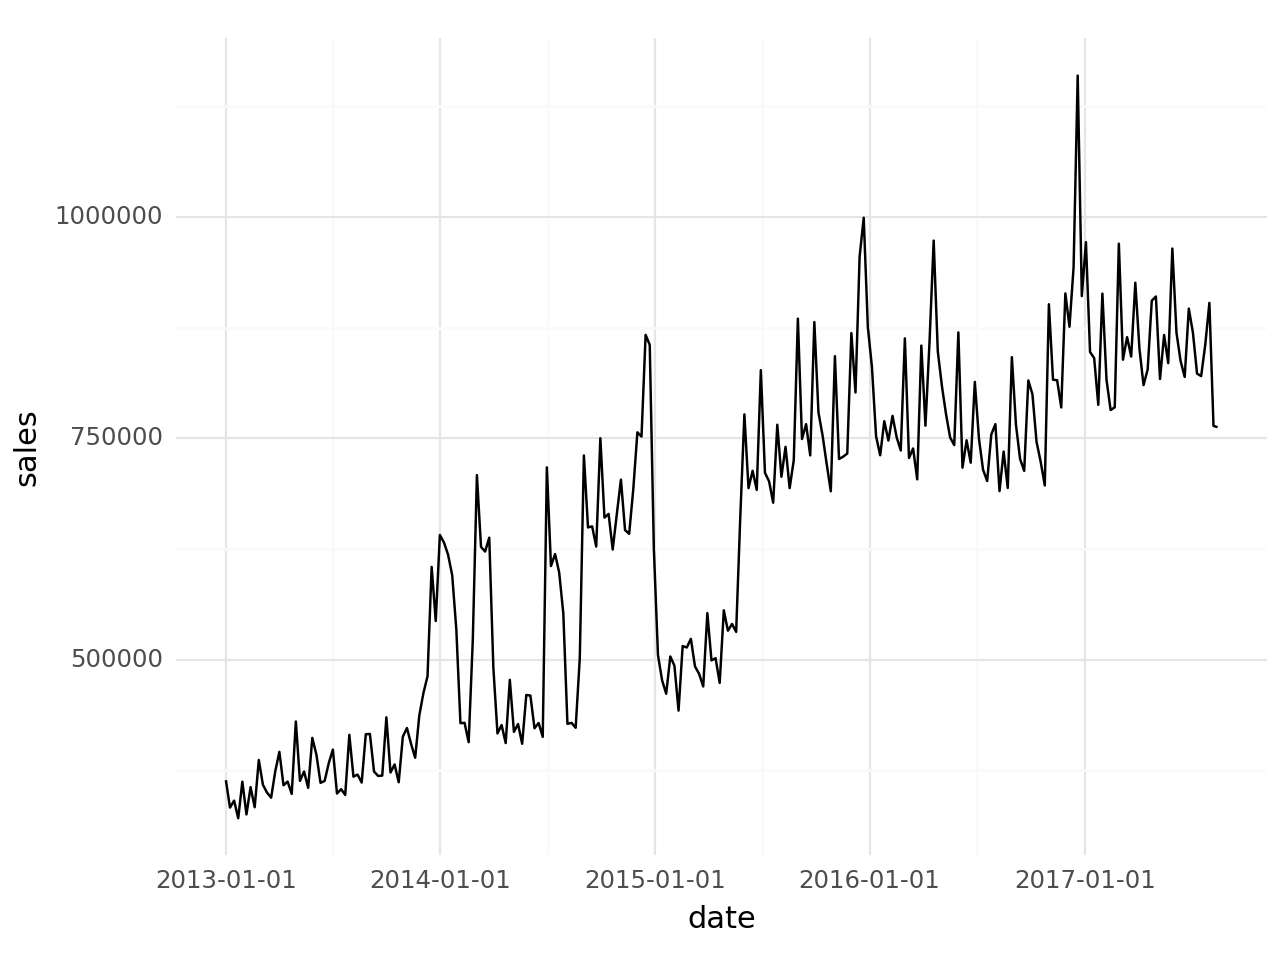

In [4]:
df=sum_sales_by_date
print(df.columns)
# Resample the data to get a 7-day rolling mean
df.set_index('date', inplace=True)
df_resampled = df.resample('7D').mean()

# Reset the index to make 'date' a column again
df_resampled.reset_index(inplace=True)

print(df_resampled.head)
# Plot using plotnine
df_resampled.set_index('date', inplace=True)
plot=(p9.ggplot(df_resampled.reset_index(), p9.aes(x='date', y='sales')) +
    p9.geom_line() +
    p9.theme_minimal()
        #p9.scale_x_datetime( .strftime('%Y-%m-%d'))
        # You can customize the plot further if needed
        # For example, add labels, titles, or adjust the x-axis date format
        # labs(title="5-Day Rolling Average of Sales", x="Date", y="Sales") +
        # theme(legend_position='top')
         )
# Display the plot
print(plot)

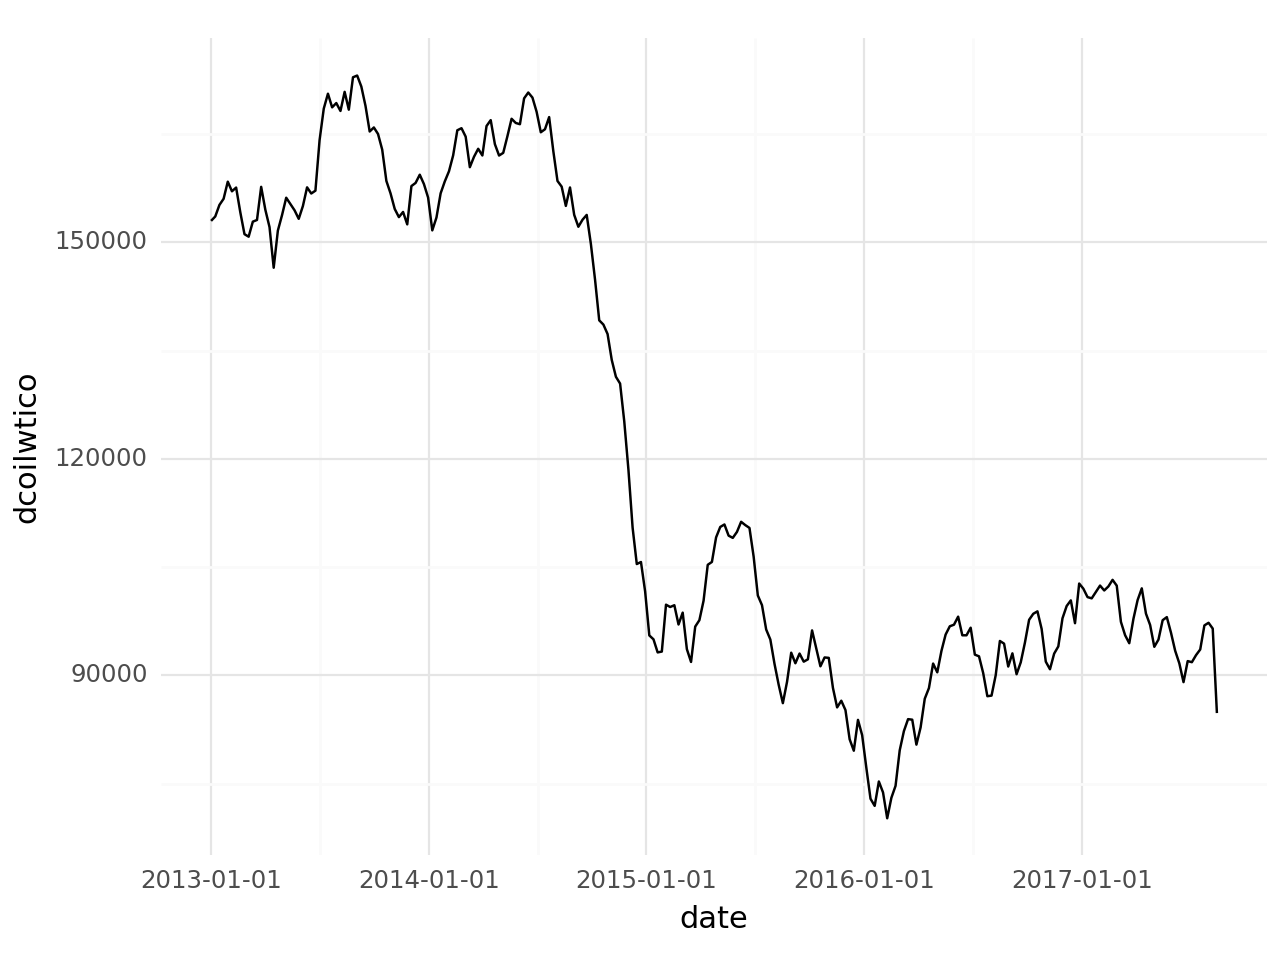

In [5]:
import pandas as pd
import plotnine as p9
df=oilprice_by_date
# Assuming df is your DataFrame
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Resample the data to get a 7-day rolling mean
df_resampled = df.resample('7D').mean()

# Plot using plotnine
plot = (
    p9.ggplot(df_resampled.reset_index(), p9.aes(x='date', y='dcoilwtico')) +
    p9.geom_line() +
    p9.theme_minimal()
    # Customize the plot further if needed
    # For example, add labels, titles, or adjust the x-axis date format
    # p9.labs(title="7-Day Rolling Average of Oil Price", x="Date", y="Oil Price") +
    # p9.scale_x_datetime(labels=pd.date_range(df_resampled.index.min(), df_resampled.index.max(), freq='7D').strftime('%Y-%m-%d')) +
    # p9.theme(legend_position='top')
)

# Display the plot
print(plot)


        date     dcoilwtico
0 2013-01-01  152985.799381
1 2013-01-08  153596.770809
2 2013-01-15  155195.479381
3 2013-01-22  156048.293666
4 2013-01-29  158420.899381


C:\Users\joona\anaconda3\Lib\site-packages\plotnine\scales\scales.py:50: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.



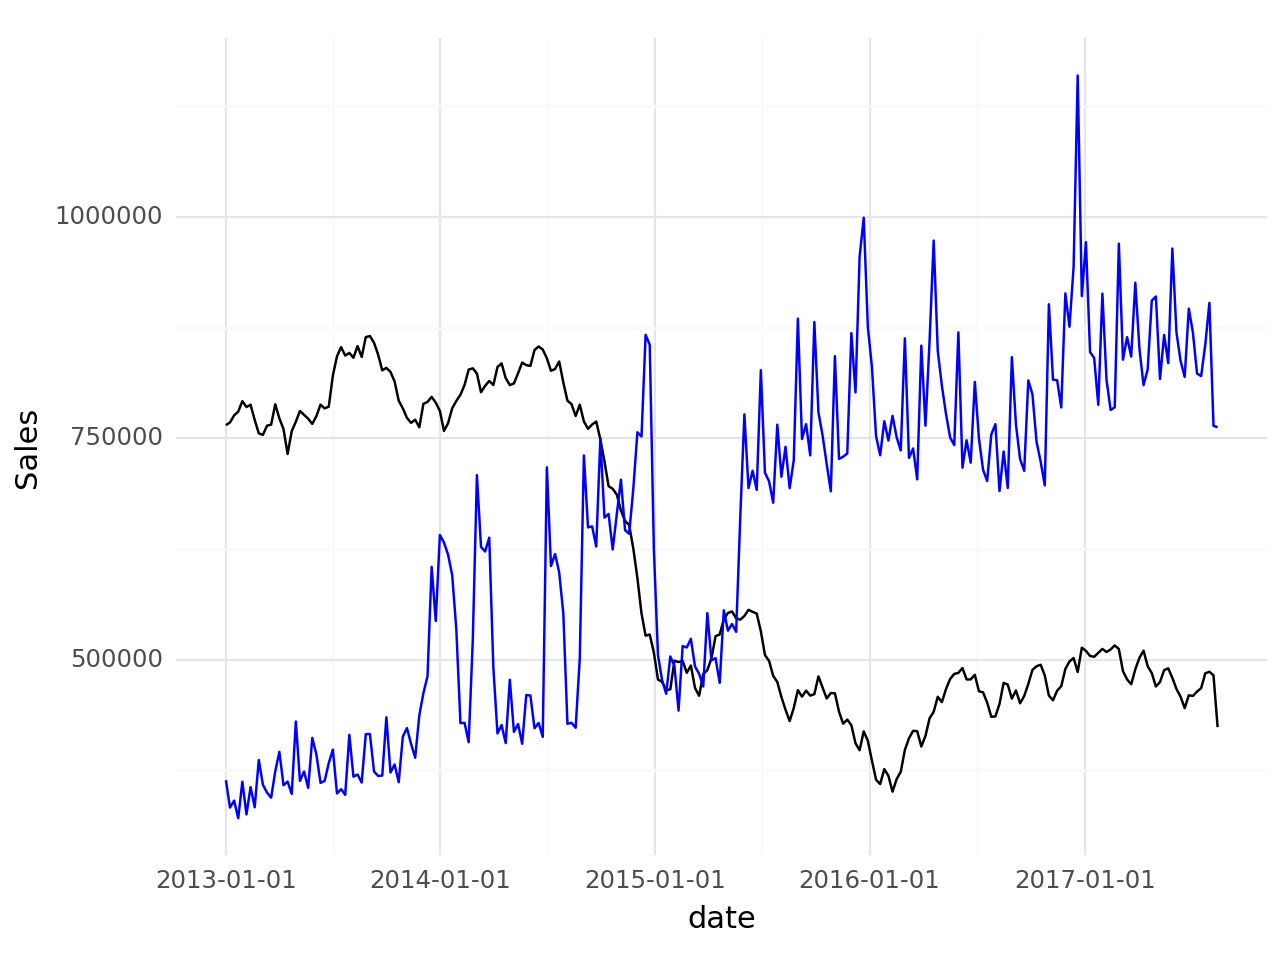

In [28]:
# Assuming oilprice_by_date and sum_sales_by_date are existant

# Resample the data to get a 7-day rolling mean for both DataFrames
oilprice_resampled = oilprice_by_date.resample('7D').mean().reset_index()
sales_resampled = sum_sales_by_date.resample('7D').mean().reset_index()
print(oilprice_resampled.head())
oilprice_resampled['dcoilwtico']=oilprice_resampled['dcoilwtico']*5
# Plot using plotnine with dual y-axes
plot = (
    p9.ggplot() +
    p9.geom_line(p9.aes(x='date', y='dcoilwtico'), color='black', data=oilprice_resampled) +
    p9.geom_line(p9.aes(x='date', y='sales'), color='blue', data=sales_resampled) +
    p9.scale_y_continuous(name="Oil Price") +
    p9.scale_y_continuous(name="Sales") +
    p9.theme_minimal()
)

# Display the plot
print(plot)


Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'dcoilwtico', 'city', 'state', 'type', 'cluster', 'holiday'],
      dtype='object')
1073644952.2030689


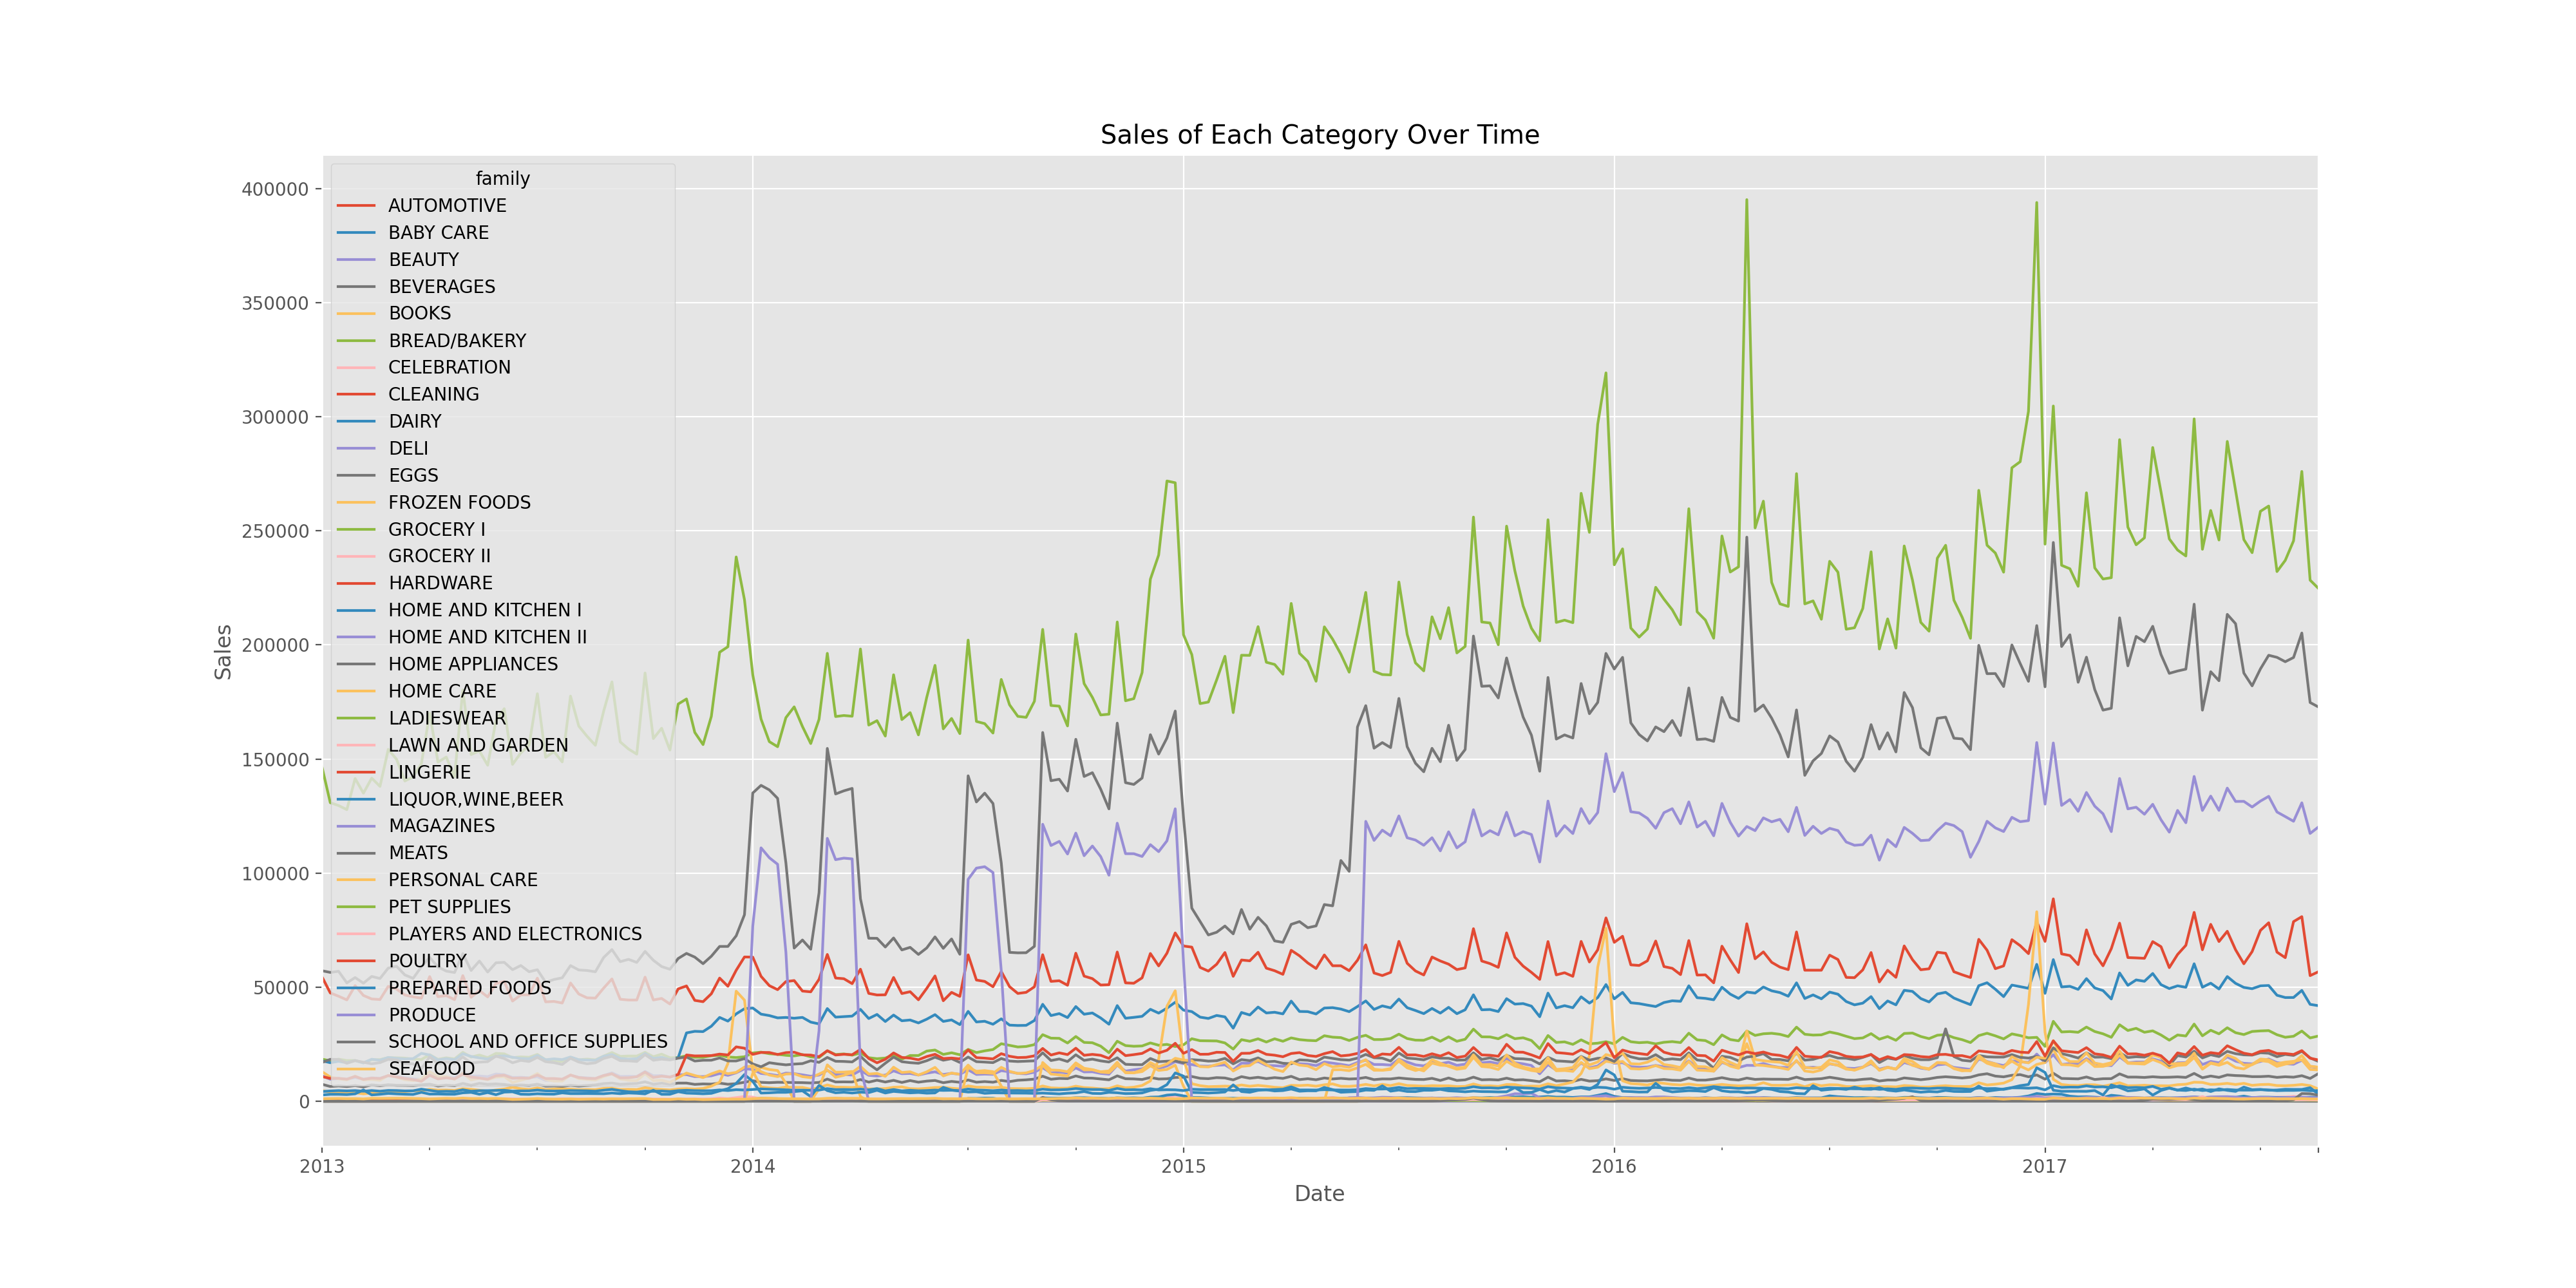

In [54]:
import matplotlib.pyplot as plt
data = pd.read_csv("merged_data.csv")
# Convert 'date' to datetime format if it's not already
data['date'] = pd.to_datetime(data['date'])
print(data.columns)
wholesales=data['sales'].sum()
print(wholesales)
data['sales']
# Group by 'date' and 'family', summing the sales for each category on each date
sales_by_category = data.groupby(['date', 'family'])['sales'].sum().reset_index()
# Pivot the table to have 'date' as the index, 'family' as columns, and 'sales' as values
sales_pivot = sales_by_category.pivot(index='date', columns='family', values='sales')
# Resample the data to get the weekly average
sales_pivot_resampled = sales_pivot.resample('W').mean()
# Plot the data
sales_pivot_resampled.plot(figsize=(20, 10))
fig = plt.figure(1)
plt.title('Sales of Each Category Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
fig.savefig('samplefigure', bbox_inches='tight')
plt.show()